**Basic EDA of Data**

Begin by importing the packages required for basic EDA analysis, as well as mounting data file location (Google Drive) to notebook. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Read the provided starcraft player data .csv file into a pandas dataframe that will be used for analysis throughout the model development process. Output a few rows of the dataframe (.head()) and add an additional column (Rank), that ranks each row beginning from 1 to the total number of the rows in the frame.

In [2]:
starcraftdata = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/starcraft_player_data.csv')
starcraftdata['Rank'] = range(1, len(starcraftdata) + 1)
print(starcraftdata.head())

   GameID  LeagueIndex Age HoursPerWeek TotalHours       APM  SelectByHotkeys  \
0      52            5  27           10       3000  143.7180         0.003515   
1      55            5  23           10       5000  129.2322         0.003304   
2      56            4  30           10        200   69.9612         0.001101   
3      57            3  19           20        400  107.6016         0.001034   
4      58            3  32           10        500  122.8908         0.001136   

   AssignToHotkeys  UniqueHotkeys  MinimapAttacks  ...  NumberOfPACs  \
0         0.000220              7        0.000110  ...      0.004849   
1         0.000259              4        0.000294  ...      0.004307   
2         0.000336              4        0.000294  ...      0.002926   
3         0.000213              1        0.000053  ...      0.003783   
4         0.000327              2        0.000000  ...      0.002368   

   GapBetweenPACs  ActionLatency  ActionsInPAC  TotalMapExplored  WorkersMade  \

Use the (.shape) function to output the size of the dataframe that will be considered.

In [3]:
print(starcraftdata.shape)

(3395, 21)


Use the (.dtypes) function to output the data type of each variable (column header) that is listed in the dataframe.

In [4]:
print(starcraftdata.dtypes)

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
Rank                      int64
dtype: object


Use the (.isnull()) and (.sum()) functions to output the total number of null entries that may exist in each column.

In [5]:
print(starcraftdata.isnull().sum())

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
Rank                    0
dtype: int64


Use the (.describe()) function to output some basic statistical metrics of each variable in the dataframe. These metrics include the total number, mean, standard deviation, minimum, 25% quartile, 50% quartile, 75% quartile, and the maximum value.

In [6]:
print(starcraftdata.describe())

             GameID  LeagueIndex          APM  SelectByHotkeys  \
count   3395.000000  3395.000000  3395.000000      3395.000000   
mean    4805.012371     4.184094   117.046947         0.004299   
std     2719.944851     1.517327    51.945291         0.005284   
min       52.000000     1.000000    22.059600         0.000000   
25%     2464.500000     3.000000    79.900200         0.001258   
50%     4874.000000     4.000000   108.010200         0.002500   
75%     7108.500000     5.000000   142.790400         0.005133   
max    10095.000000     8.000000   389.831400         0.043088   

       AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
count      3395.000000    3395.000000     3395.000000         3395.000000   
mean          0.000374       4.364654        0.000098            0.000387   
std           0.000225       2.360333        0.000166            0.000377   
min           0.000000       0.000000        0.000000            0.000000   
25%           0.0002

The basic EDA provides interesting information about the relevance of the variables, the size of the data that is being considered, as well as the existence of any entries that may cause obstacles in further analysis.

**PCA Analysis**

Begin by importing the necessary packages to perform Principle Component Analysis (PCA).

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

Modify the original dataframe by first removing the target variable (Rank), which is to be predicted, and eliminate rows that include placeholder symbols (in the case of this data the placeholders were marked with "?"). The resulting dataframe includes only the predictor variables, as well as all entries containing meaningful data.

In [8]:
starcraftdata = starcraftdata.drop('Rank', axis = 1)
starcraftdata.loc[starcraftdata["Age"] == '?']
starcraftdata = starcraftdata.drop(starcraftdata.index[3340:3395])
starcraftdata.loc[starcraftdata["HoursPerWeek"] == '?']
starcraftdata = starcraftdata.drop(starcraftdata.index[1841])
starcraftdata.loc[starcraftdata["TotalHours"] == '?']
starcraftdata = starcraftdata.drop(starcraftdata.index[358])

Prior to performing PCA analysis, the dataframe must be standardized. This is achieved through use of the StandardScaler() function, which normalizes all data to a unit center. Create a new dataframe that contains the scaled version of the original dataframe.

In [9]:
scaler = StandardScaler()
starcraftdata_scaled = scaler.fit_transform(starcraftdata)

Next, implement the (PCA()) function that has subsidiary functions (.fit()), and (.explained_variance_ratio), which are used to calculate the influence of each predictor variable on the overall variance within the data. The array of 20 elements is outputted, with each element corresponding to the variance attributed to each respective predictor variable).

In [10]:
pca = PCA()
pca.fit(starcraftdata_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.2681407  0.10402508 0.07600433 0.06518002 0.05474952 0.0508213
 0.04969031 0.04556647 0.04246669 0.03836914 0.03654652 0.03557084
 0.02971479 0.02558101 0.02112286 0.01965001 0.01780703 0.0126635
 0.00553978 0.00079011]


Following this, implement the (.cumsum()) function that is a subsidiary of (np()), to output an array of the cumulative variance influences across the 20 predictor variables. Note that the final element should be the cumulative sum of all 20 predictor variables, and thus should sum to 1, which is what occurs in the provided output.

In [11]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print(cumulative_variance_ratio)

[0.2681407  0.37216578 0.44817011 0.51335013 0.56809966 0.61892095
 0.66861126 0.71417773 0.75664442 0.79501355 0.83156008 0.86713091
 0.8968457  0.92242671 0.94354958 0.96319958 0.98100661 0.99367011
 0.99920989 1.        ]


Finally, set an arbitrary variance treshold (in this case 0.95), to effectively choose a subset of the twenty predictor variables that have a cumulative sum greater than or equal to this threshold. Output this number of variables, which for this dataframe results in 16 predictor variables.

In [12]:
d_var = 0.95
ncomp = np.argmax(cumulative_variance_ratio >= d_var) + 1
print('Number of components for', d_var, 'variance:', ncomp)


Number of components for 0.95 variance: 16


From here, set up a modified pca function that utilizes the ( fit_transform) subset function to standardize the original starcraft data.  

In [13]:
pca = PCA(n_components = ncomp)
starcraftdata_pca = pca.fit_transform(starcraftdata_scaled)

Output a new dataframe that merges the (Rank) column with the PCA values for each predictor variable, which explains the effect of each predictor variable against the (Rank) variable. Negative values imply an inverse influence and positive values imply a positive influence

In [14]:
Fstarcraftdata_pca = pd.DataFrame(starcraftdata_pca, columns = ['PC{}'.format(index+1) for index in range(ncomp)])
starcraftdata['Rank'] = range(1, len(starcraftdata) + 1)
Fstarcraftdata_pca['Rank'] = starcraftdata['Rank']
print(Fstarcraftdata_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.367399  0.065509 -1.091530  0.683940 -1.708485  0.015044  0.699964   
1 -0.875761 -0.480408 -0.308420 -0.019047 -1.724508  0.473142  0.295320   
2  1.458295  0.539214  0.009914  1.362794 -0.922718  1.079815 -0.403896   
3  0.616584  0.186633  0.169897 -1.505770 -1.536069  0.619311 -0.103235   
4  0.911153 -2.516123  3.097753  1.309652 -1.429230 -0.039441  0.749894   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -1.620309  0.024300  0.915690 -0.692253 -0.105326 -0.190967 -1.332451   
1 -1.228490  1.251969  0.130006  0.286941 -0.438242  0.364688 -0.978566   
2 -1.763668  1.218871  0.557282 -0.276248 -0.421970  0.599433 -0.086854   
3  0.144190  1.035109 -0.637236 -1.247003 -1.023399  0.137811  0.044767   
4 -1.335033  0.157365  0.551743 -2.562749 -0.705325  0.596034  0.410790   

       PC15      PC16  Rank  
0  0.623490 -0.157228   1.0  
1  0.490774 -0.249074   2.0  
2  0.222

Produce a scree plot of the explained variance ratio against the predictor variables, which visualizes the trend and effect of each variable on the target variable.

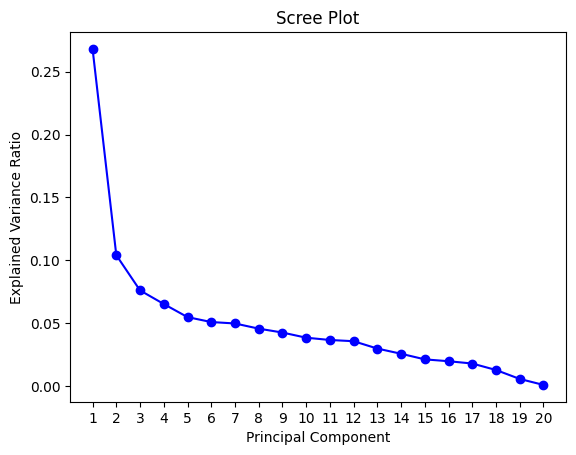

In [15]:
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()

**Random Forest**

Now that the PCA analysis has allowed for the removal of 4 predictor variables that do not contribute to the 0.95 variance threshold, consider the development of an ML model that can attempt to predict player rankings with some level of accuracy.

Begin by importing and loading the necessary packages into the program. Thses packages include tools for Random Forest model development as well as visualization.

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve

Next, preprocess the dataframe being considered by removing two variables: Rank and GameID. These two variables can be considered the target variables (the variables to be predicted by others) (X). Secondly, create a new dataframe that contains only the Rank variable (Y). Following this, to find the ideal number of nodes that the Random Forest should utilize, create a validation curve which inputs the 'range_estimators' values and selects the node value that results in the lowest 'test_score_mean' - which for this data is 2000.

In [17]:
X = starcraftdata.drop(columns=['Rank', 'GameID'], axis = 1)
Y = starcraftdata['Rank']
range_estimators = [100, 500, 1000, 2000]
RFmodel = RandomForestRegressor(random_state=123)
train_score, test_score = validation_curve(RFmodel, X, Y, param_name= 'n_estimators', param_range= range_estimators, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
train_score_mean = -np.mean(train_score, axis=1)
train_score_std = np.std(train_score, axis=1)
test_score_mean = -np.mean(test_score, axis=1)
test_score_std = np.std(test_score, axis=1)
optimal_node_val = range_estimators[np.argmin(test_score_mean)]
print('Optimal Node Value =', optimal_node_val)



Optimal Node Value = 2000


Once the node value is found, split the newly created X, Y dataframes into testing and training pieces, with the Random Forest model using the former set to learn, and the latter set to test the accuracy. The variable y_pred contains the Random Forest's output for the training data, and y_pred is used to cross check against the true rankings stored in y_test.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)
RFmodel = RandomForestRegressor(n_estimators=2000, random_state = 123)
RFmodel.fit(X_train, y_train)
y_pred = RFmodel.predict(X_test)
y_pred_copy = X_test.copy()
y_pred_copy['Rank Prediction'] = y_pred
y_pred_copy = y_pred_copy.sort_values('Rank Prediction')
print(y_pred_copy.head())


      LeagueIndex Age HoursPerWeek TotalHours       APM  SelectByHotkeys  \
3196            4  17           16        400  120.9438         0.002848   
2206            5  17           20        500  119.6562         0.001361   
1238            3  22           10         90   43.3578         0.000245   
1135            4  17            6        200   83.7276         0.000847   
560             4  17           28        450  141.6522         0.002045   

      AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
3196         0.000354              2        0.000230            0.001698   
2206         0.000164              4        0.000009            0.001206   
1238         0.000163              3        0.000054            0.000313   
1135         0.000208              1        0.000032            0.000592   
560          0.000543              6        0.000000            0.000703   

      NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
3196      0.002724 

Finally, with y_pred and y_test being cross-checked, a visualization is produced which provides the importance of each predictor variable in the Random Forest model on the target variable. It is clear the most important predictor variable based on this model is WorkersMade, and the least influential predictor variable on the model is LeagueIndex. To observe the accuracy of the Random Forest model on the dataset, use the (.score()) function to output the accuracy of the Random Forest model (as a decimal - multiply by 100 to get as a percent) on both the training and testing data sets.

Model Training Accuracy: 0.8652336594861256
Model Testing Accuracy: 0.019158008349395073


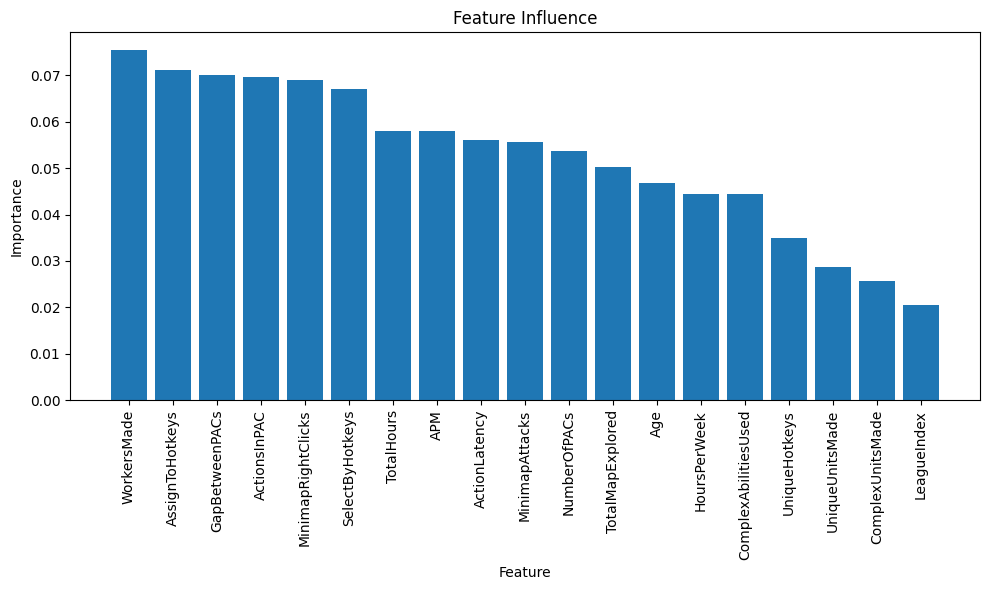

In [19]:
print(f'Model Training Accuracy: {RFmodel.score(X_train, y_train)}')
print(f'Model Testing Accuracy: {RFmodel.score(X_test, y_test)}')
important_features = RFmodel.feature_importances_
indexsorted = important_features.argsort()[::-1]
important_features_sorted = important_features[indexsorted]
important_feature_names = X.columns[indexsorted]
plt.figure(figsize=(10, 6))
plt.bar(range(len(important_features_sorted)), important_features_sorted, tick_label=important_feature_names)
plt.title('Feature Influence')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

**Results (Non-Technical)**

The Random Forest model that was developed on the starcraft data set is a self-learning model that takes in a subset of the original dataset as an input (training data), and uses the remaining data (testing data), to preddict the target variable. In the case of this data, the target variable (output), was the rank of the players. The Random Forest model predicts the rank of the players based on all the other columns of data provided. Finally, to test the validity of the model, its prediction output rankings are crosschecked against the actual rankings given by the testing data. The ratio of how many predictions match the actual rankings to the overall count of data provides the model accuracy. As such, the goal of this models is to increase said ratio to as close to 1 (100%) as possible - making it a viable model for the data. 

**Stakeholders (Further Data Collection)**

After considering this model, if stakeholders mention that they can collect more data, there are some modifications that should be noted. To begin, the EDA and PCA analysis support the need for only 16 potential predictor variables, thus the 4 variables that were removed via PCA analysis do not need to be provided in the next set of data to be analyzed. Secondly, given that the resultant model was not accurate to a large extent, the stakeholders should provide a larger volume of data which would allow for a greater learning (training) set for the Random Forest model. If this volume of data is significant, the model will quickly pick up the learning rate, and thus the accuracy should immediately increase as well. Overall, the stakeholders should follow the format of data collection as done with the data that was used for this analysis, but with these minimal modifications, which will allow for a stronger and more robust ML model.